In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penyisihan-hology-7-data-mining-competition/sample_submission.csv
/kaggle/input/penyisihan-hology-7-data-mining-competition/train.csv
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1075.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/820.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1024.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/785.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/792.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1009.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/915.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/815.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/817.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1055.jpg
/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/795.jpg
/kaggle/inpu

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import shutil
from PIL import Image
from tqdm import tqdm

In [3]:
# Set directory paths
dataset_folder = '/kaggle/input/penyisihan-hology-7-data-mining-competition/train/train'  # Update with your dataset folder path
output_folder = '/kaggle/working/'   # Output folder for separated images

# Read the dataset
data = pd.read_csv('/kaggle/input/penyisihan-hology-7-data-mining-competition/train.csv')  # Update with your CSV file name

# Create output directories for train and validation
train_folder = os.path.join(output_folder, 'train')
validation_folder = os.path.join(output_folder, 'validation')

for folder in [train_folder, validation_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# Shuffle the dataset and split into train and validation sets
data = data.sample(frac=1, random_state=42)  # Shuffle the dataset
train_data = data.iloc[:int(0.8 * len(data))]  # 80% for training
validation_data = data.iloc[int(0.8 * len(data)):]  # 20% for validation

# Function to copy images to the appropriate folder
def copy_images(data_subset, target_folder):
    for index, row in data_subset.iterrows():
        image_id = row['id']
        jenis = row['jenis']
        warna = row['warna']
        
        # Create folder name based on jenis and warna
        folder_name = f'jenis_{jenis}_warna_{warna}'
        folder_path = os.path.join(target_folder, folder_name)
        
        # Create folder if it doesn't exist
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        
        # Set image file names
        jpg_file = f'{image_id}.jpg'
        png_file = f'{image_id}.png'
        
        # Try to copy JPG first
        source_path_jpg = os.path.join(dataset_folder, jpg_file)
        destination_path_jpg = os.path.join(folder_path, jpg_file)
        
        if os.path.exists(source_path_jpg):
            shutil.copy2(source_path_jpg, destination_path_jpg)  # Copy JPG file
        else:
            # If JPG doesn't exist, try PNG
            source_path_png = os.path.join(dataset_folder, png_file)
            destination_path_png = os.path.join(folder_path, png_file)
            
            if os.path.exists(source_path_png):
                shutil.copy2(source_path_png, destination_path_png)  # Copy PNG file
            else:
                print(f'File {source_path_jpg} and {source_path_png} not found.')

# Copy images for train and validation sets
copy_images(train_data, train_folder)
copy_images(validation_data, validation_folder)

print("complete.")

complete.


In [4]:
def count_items_in_directory(directory):
    item_count = 0
    for root, dirs, files in os.walk(directory):
        item_count += len(files)
    return item_count

def count_items(base_path):
    categories = ['train', 'validation']
    classes = ['jenis_0_warna_0', 'jenis_0_warna_1', 'jenis_0_warna_2','jenis_0_warna_3','jenis_0_warna_2',
               'jenis_1_warna_0','jenis_1_warna_1','jenis_1_warna_2', 'jenis_1_warna_3', 'jenis_1_warna_4',]

    for category in categories:
        print(f"--- {category.capitalize()} Data ---")
        category_path = os.path.join(base_path, category)
        for class_name in classes:
            class_path = os.path.join(category_path, class_name)
            if os.path.exists(class_path):
                num_items = count_items_in_directory(class_path)
                print(f"{class_name.capitalize()}: {num_items} images")
            else:
                print(f"{class_name.capitalize()}: Directory does not exist")

#Defini datasumber
base_path = '/kaggle/working'
count_items(base_path)

--- Train Data ---
Jenis_0_warna_0: 65 images
Jenis_0_warna_1: 56 images
Jenis_0_warna_2: 86 images
Jenis_0_warna_3: 108 images
Jenis_0_warna_2: 86 images
Jenis_1_warna_0: 28 images
Jenis_1_warna_1: 45 images
Jenis_1_warna_2: 44 images
Jenis_1_warna_3: 78 images
Jenis_1_warna_4: 40 images
--- Validation Data ---
Jenis_0_warna_0: 15 images
Jenis_0_warna_1: 15 images
Jenis_0_warna_2: 17 images
Jenis_0_warna_3: 23 images
Jenis_0_warna_2: 17 images
Jenis_1_warna_0: 8 images
Jenis_1_warna_1: 9 images
Jenis_1_warna_2: 15 images
Jenis_1_warna_3: 25 images
Jenis_1_warna_4: 9 images


In [5]:
from PIL import Image

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                img.verify()
            except (IOError, Image.UnidentifiedImageError) as e:
                print(f"File tidak valid ditemukan: {img_path}, Error: {e}")

# memeriksa semua dataset
check_images_in_directory("/kaggle/working/train")
check_images_in_directory("/kaggle/working/validation")

In [6]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

In [8]:
os.environ['WANDB_MODE'] = 'disabled'

In [9]:
!yolo task=classify mode=train model=yolov8x-cls.pt data=/kaggle/working epochs=50 imgsz = 480 patience=10

100%|████████████████████████████████████████| 110M/110M [00:02<00:00, 44.9MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=/kaggle/working, epochs=50, time=None, patience=10, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

In [10]:
!yolo task=classify mode=val 
model="runs/classify/train/weights/best.pt"
data="/kaggle/working/"

100%|██████████████████████████████████████| 5.52M/5.52M [00:00<00:00, 22.0MB/s]
WARNING ⚠️ 'data' argument is missing. Using default 'data=imagenet10'.
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 112 layers, 2,807,024 parameters, 0 gradients, 4.2 GFLOPs

Dataset not found ⚠️, missing path /kaggle/working/datasets/imagenet10, attempting download...
100%|██████████████████████████████████████| 71.1k/71.1k [00:00<00:00, 1.05MB/s]
Unzipping /kaggle/working/datasets/imagenet10.zip to /kaggle/working/datasets/im
Dataset download success ✅ (1.7s), saved to /kaggle/working/datasets/imagenet10

train: /kaggle/working/datasets/imagenet10/train... found 12 images in 10 classes ✅ 
val: /kaggle/working/datasets/imagenet10/val... found 12 images in 10 classes ✅ 
test: None...
val: Scanning /kaggle/working/datasets/imagenet10/val... 12 images, 0 corrupt: 1
val: New cache created: /kaggle/working/datasets/imagenet10/val.cache
              

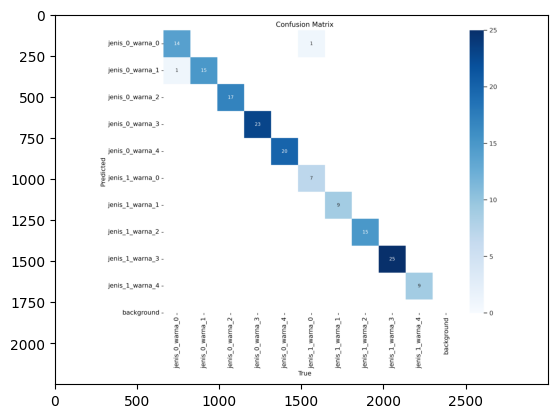

In [11]:
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

yolo_result_csv = "/kaggle/working/runs/classify/train/results.csv"

pd.read_csv(yolo_result_csv).head(20)

img= Image.open('/kaggle/working/runs/classify/train/confusion_matrix.png')
plt.imshow(img)

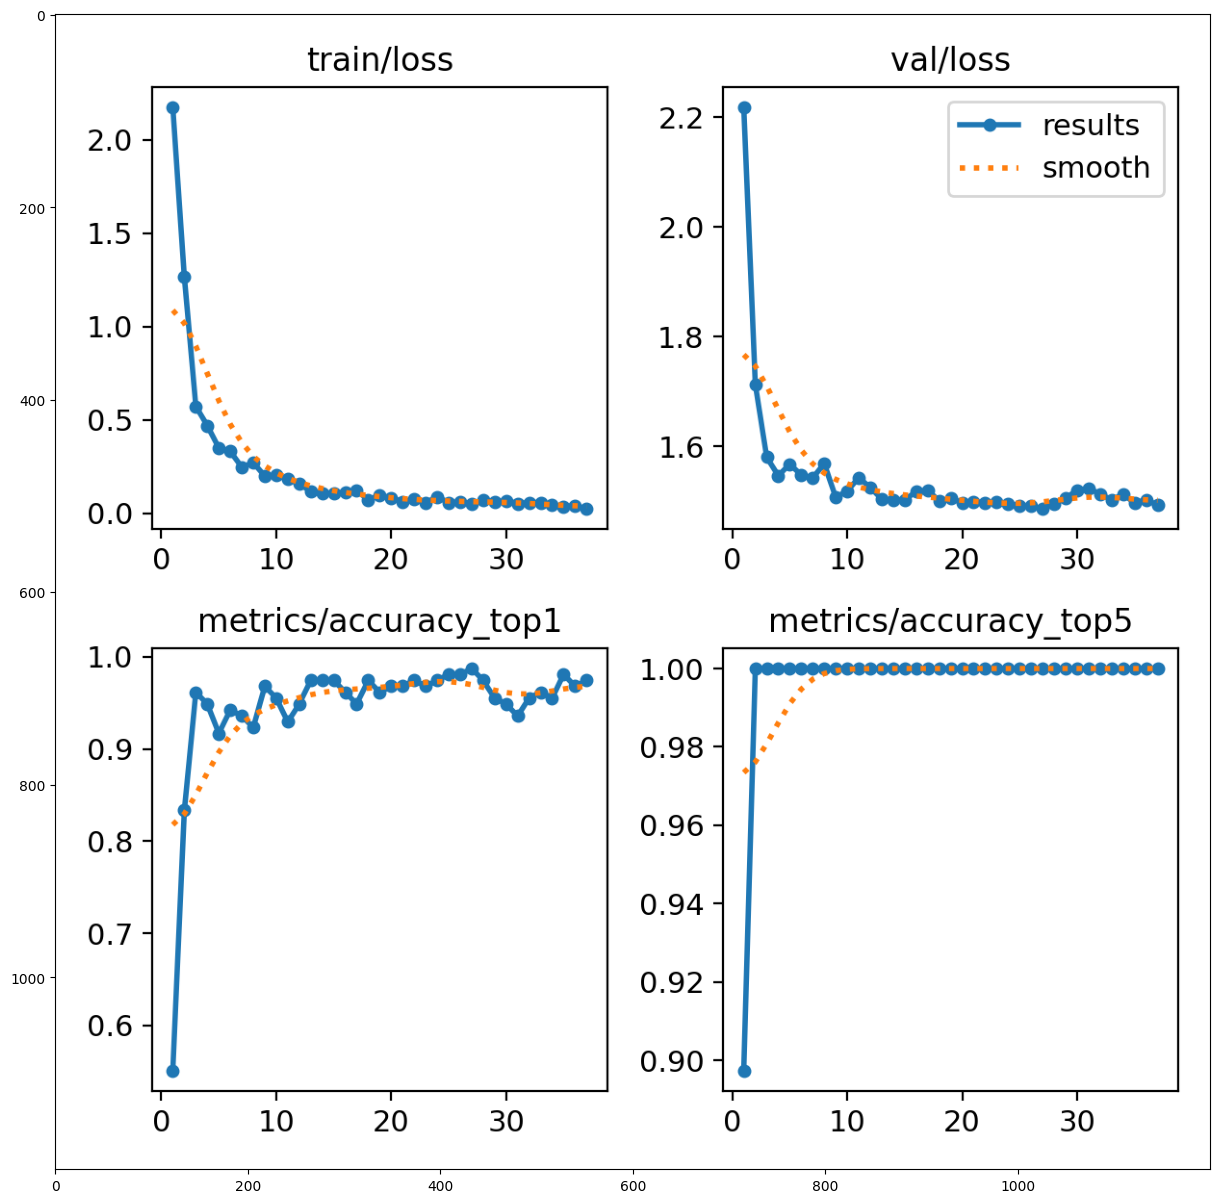

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

yolo_result_img = "/kaggle/working/runs/classify/train/results.png"
yolo_result_img = Image.open(yolo_result_img)
plt.figure(figsize = (15, 15))
plt.imshow(yolo_result_img)
plt.show()

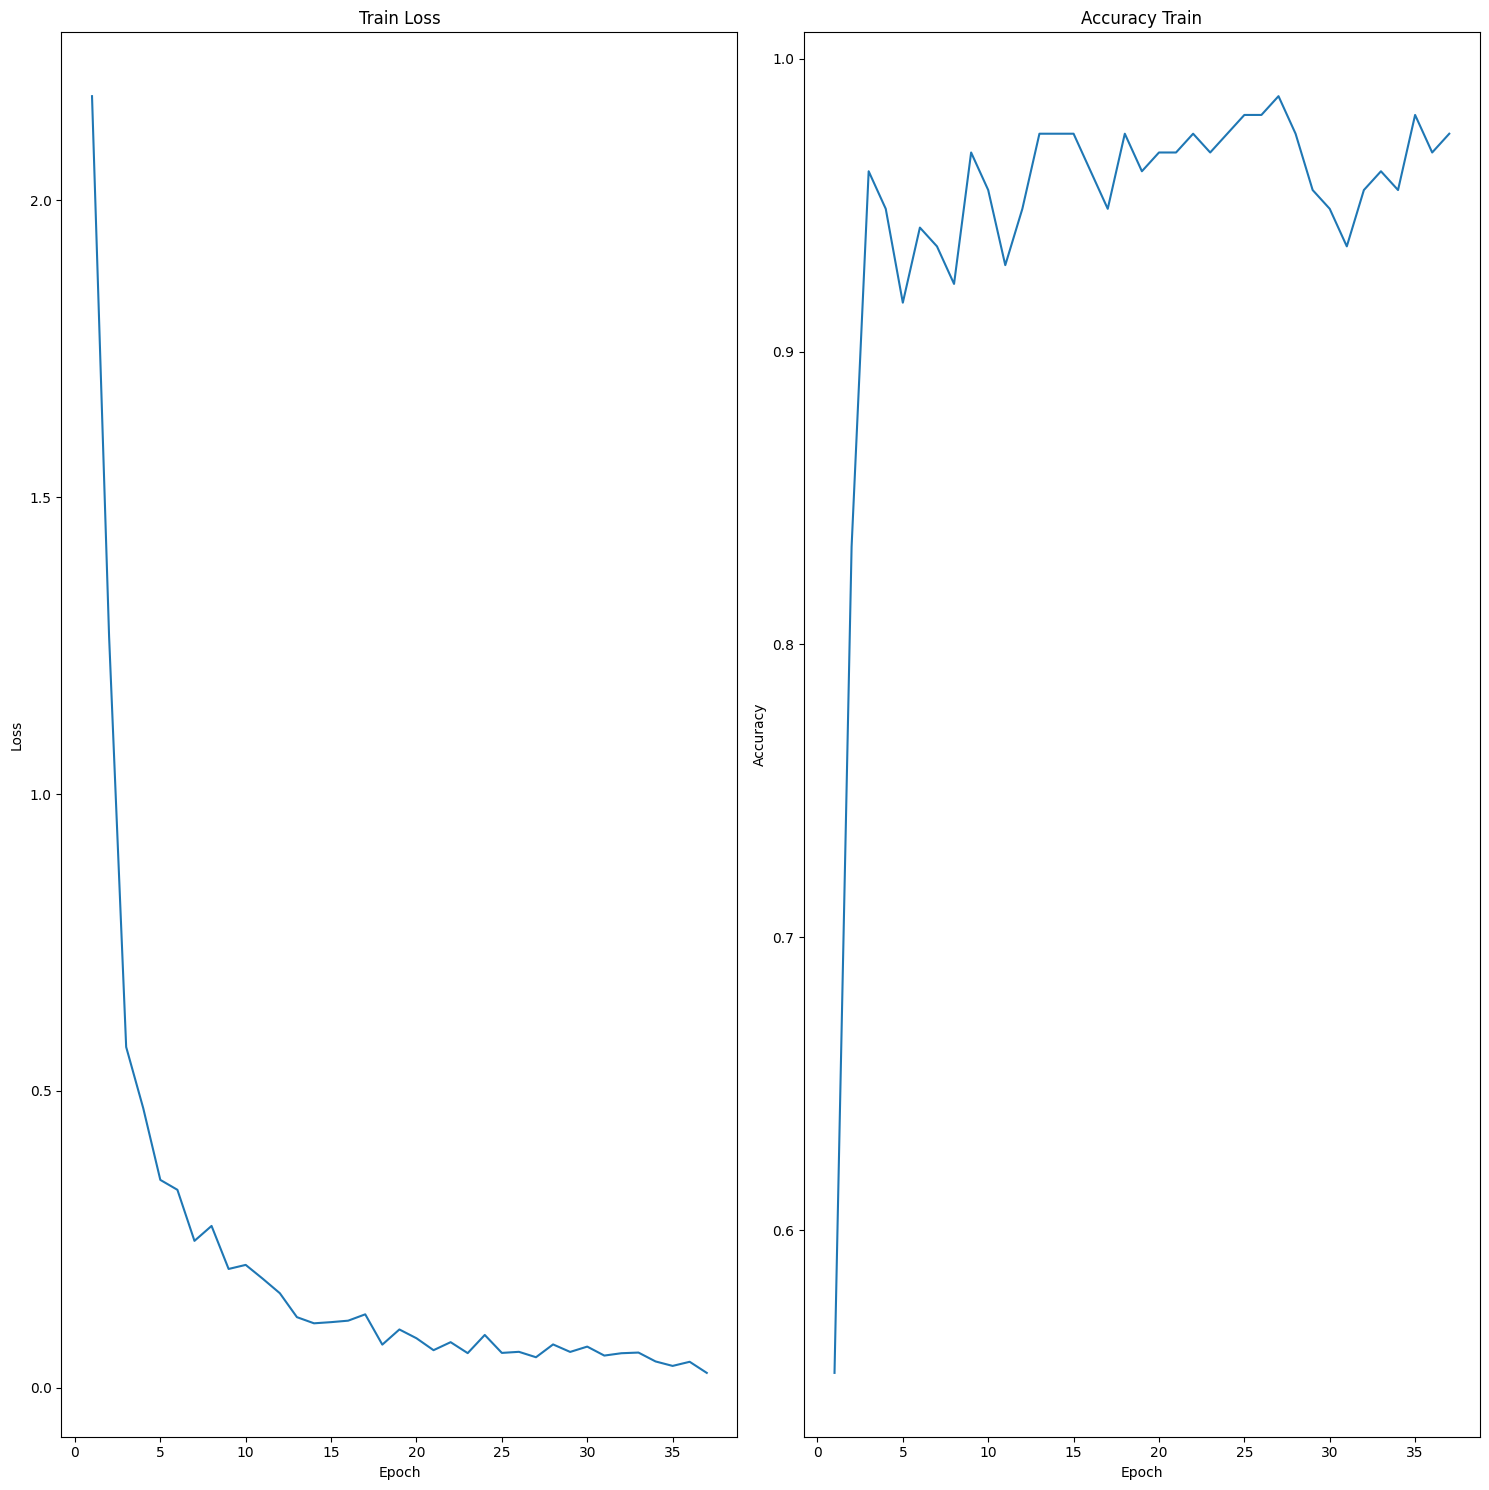

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/classify/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/loss', data=df, ax=axs[0])  # Use axs[0] for the first subplot
sns.lineplot(x='epoch', y='metrics/accuracy_top1', data=df, ax=axs[1])  # Use axs[1] for the second subplot

# set titles and axis labels for each subplot
axs[0].set(title='Train Loss', xlabel='Epoch', ylabel='Loss')
axs[1].set(title='Accuracy Train', xlabel='Epoch', ylabel='Accuracy')

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()
plt.show()

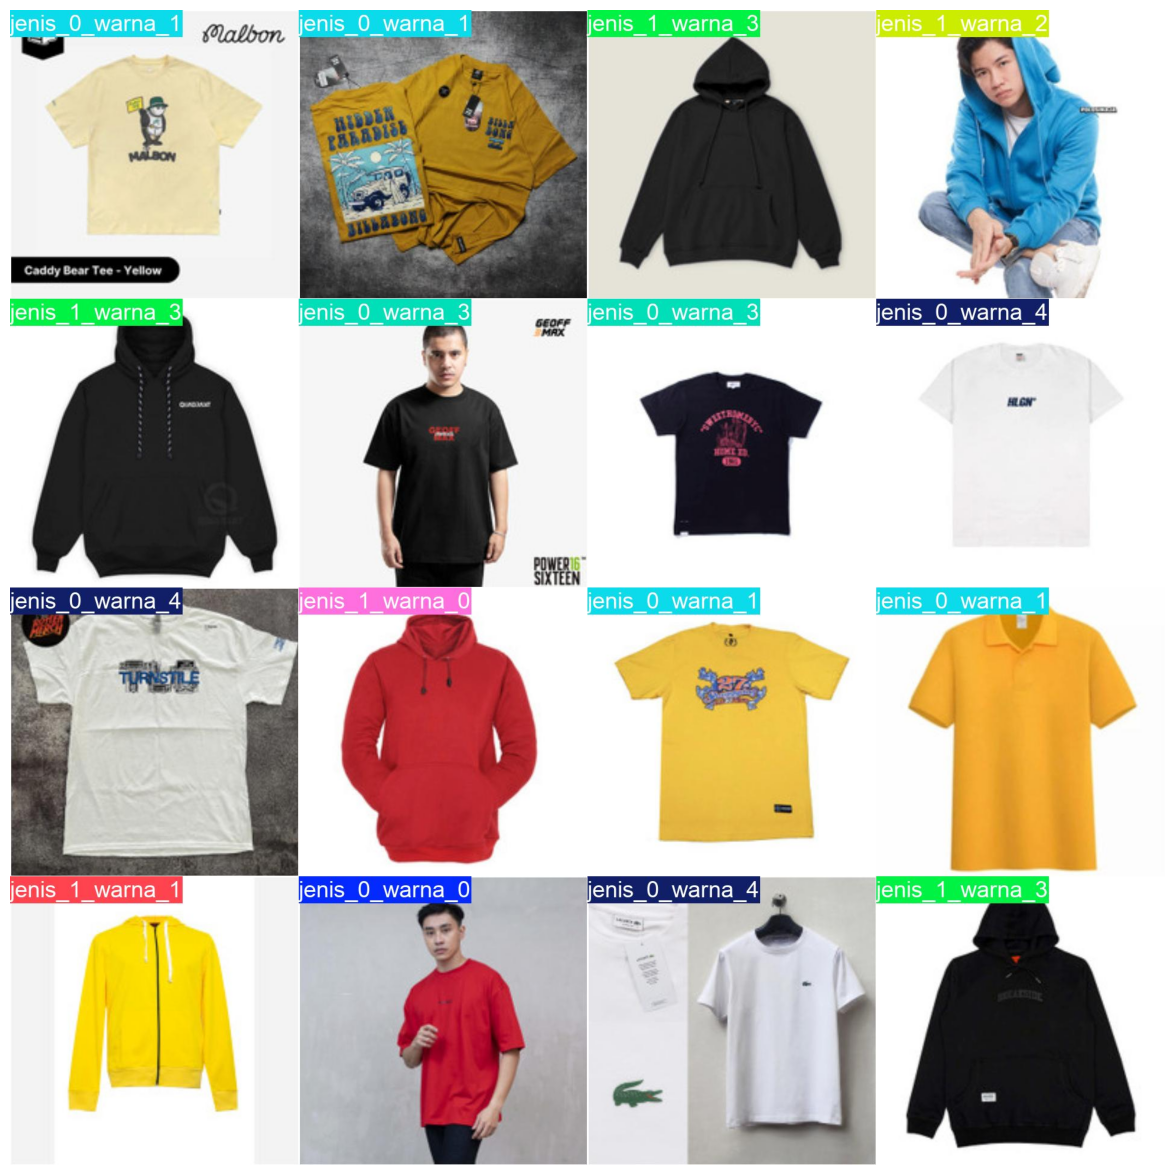

In [14]:
yolo_pred_img = "/kaggle/working/runs/classify/train/val_batch1_pred.jpg"
yolo_pred_img = Image.open(yolo_pred_img)

plt.figure(figsize = (15, 15))
plt.imshow(yolo_pred_img)
plt.axis("off");

In [23]:
!yolo task=classify mode=predict 
model="/kaggle/working/runs/classify/train/weights/best.pt" 
conf=0.3
source="/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test"

WARNING ⚠️ 'source' argument is missing. Using default 'source=/opt/conda/lib/python3.10/site-packages/ultralytics/assets'.
Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 112 layers, 2,807,024 parameters, 0 gradients, 4.2 GFLOPs

image 1/2 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 224x224 minibus 0.57, police_van 0.34, trolleybus 0.04, recreational_vehicle 0.01, streetcar 0.01, 4.5ms
image 2/2 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 224x224 suit 0.35, bulletproof_vest 0.09, bow_tie 0.08, stage 0.07, rugby_ball 0.04, 4.5ms
Speed: 12.4ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [24]:
from ultralytics import YOLO

# Muat model
model = YOLO('/kaggle/working/runs/classify/train/weights/best.pt')
results_dir = "/kaggle/input/penyisihan-hology-7-data-mining-competition/test/test"

# Membuat list untuk menyimpan hasil prediksi
data = []

# Mengambil daftar semua file gambar dalam direktori results
results = [os.path.join(results_dir, f) for f in os.listdir(results_dir)]

# Iterasi melalui setiap file gambar untuk prediksi
for result_path in results:
    image_id_with_ext = os.path.basename(result_path)  # Mendapatkan ID gambar dengan ekstensi
    image_id, _ = os.path.splitext(image_id_with_ext)  # Menghapus ekstensi file
    
    # Melakukan prediksi pada gambar
    prediction = model(result_path)[0]
    
    # Mendapatkan nama-nama kelas dan probabilitas
    names_dict = model.names  # Mendapatkan daftar nama kelas
    probs = prediction.probs.data.tolist()  # Probabilitas
    
    # Mendapatkan prediksi dengan probabilitas tertinggi
    predicted_class = names_dict[np.argmax(probs)]
    
    # Memisahkan 'jenis' dan 'warna' dari prediksi
    jenis_warna = predicted_class.split('_')
    jenis = jenis_warna[1]  # Mendapatkan jenis dari prediksi
    warna = jenis_warna[3]  # Mendapatkan warna dari prediksi
    
    # Menambahkan hasil prediksi ke list
    data.append([image_id, jenis, warna])

# Membuat DataFrame dari hasil prediksi
df = pd.DataFrame(data, columns=['id', 'jenis', 'warna'])

# Menyimpan DataFrame ke CSV
df.to_csv("/kaggle/working/submission2.csv", index=False)

# Menampilkan DataFrame
print(df)


image 1/1 /kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1075.jpg: 480x480 jenis_0_warna_4 0.75, jenis_0_warna_1 0.14, jenis_0_warna_2 0.07, jenis_1_warna_4 0.03, jenis_1_warna_2 0.01, 33.8ms
Speed: 7.3ms preprocess, 33.8ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

image 1/1 /kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/820.jpg: 480x480 jenis_1_warna_1 0.96, jenis_0_warna_1 0.01, jenis_1_warna_2 0.01, jenis_0_warna_4 0.00, jenis_0_warna_3 0.00, 33.8ms
Speed: 6.4ms preprocess, 33.8ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

image 1/1 /kaggle/input/penyisihan-hology-7-data-mining-competition/test/test/1024.jpg: 480x480 jenis_0_warna_4 0.89, jenis_0_warna_2 0.09, jenis_1_warna_2 0.01, jenis_1_warna_4 0.01, jenis_0_warna_1 0.00, 25.8ms
Speed: 6.1ms preprocess, 25.8ms inference, 0.1ms postprocess per image at shape (1, 3, 480, 480)

image 1/1 /kaggle/input/penyisihan-hology-7-data-mining-competition

In [25]:
# Membaca file submission.csv yang ada di directory Anda
submission_csv = pd.read_csv('/kaggle/input/penyisihan-hology-7-data-mining-competition/sample_submission.csv')

# Membaca file submission2.csv yang baru dibuat
submission2_csv = pd.read_csv('/kaggle/working/submission2.csv')

# Menggabungkan kedua file berdasarkan kolom 'id' dengan prioritas urutan dari file submission.csv
merged = pd.merge(submission_csv[['id']], submission2_csv, on='id', how='left')

# Menyimpan hasil gabungan ke CSV baru dengan urutan sesuai file submission.csv
merged.to_csv('/kaggle/working/final_submissioon.csv', index=False)